# Introduction

The time-independent Schrodinger Equation of a confined quantum particle

 $-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V(x)\psi = E\psi$

$ \psi(0) = \psi(L) = 0 $

is an example of **regular Sturm-Liouville eigenvalue problem.** 

There exist an infinite set of real eigenvalues $E_0 < E_1 < ...$ with a smallest eigenvalue denoted $E_0$.

The corresponding eigenfunctions $\psi^0, \psi^1,...$ are **complete**. This means that any piecewise smooth function $f(x)$ on $[0,L]$ can be constructed as a linear combination of them: $f(x)\approx\sum_{i}a_{i}\psi^i$

The eigenfunctions are **orthogonal**($\int \limits _0^L \psi^i(x)\psi^j(x)dx=0$ when $i \neq j $)

The **infinite square well** is a particular case of a confined quantum particle when $V=0$.
Here we have $\psi^{(n)} = \sqrt{\frac{2}{L}}\sin(n\pi x/L)$ and $E_n=\frac{n^2\pi^2\hbar^2}{2mL^2}$. In general, when $V\neq0$, the eigenfunctions $\psi^{(n)}$ are more complicated but also orthogonal and complete as guaranteed by the Sturm-Liouville theorem. In this proposed task I will examine how to use numerical techniques to find $\psi^{(n)}$ and $E_n$ for the general case $V\neq0$.

# Mathematical Formulation

Since we eventually plan on using numerical methods to solve this problem, we must ensure we are working with dimensionless quantities. I start by choosing the common physics convention $\hbar^2 = 1$ and multiply the equation by $ m $ to get

 $-\frac{1}{2}\frac{d^2\psi}{dx^2} + mV(x)\psi = mE\psi$

we still have that pesky dimensionfull quantity $x$ in the derivative. Making the substitution to the dimensionless quantity $y=x/L$ yields the equation and boundary condition

$-\frac{1}{2}\frac{d^2\psi}{dy^2} + mL^2V(y)\psi = mL^2E\psi$

$ \psi(y=0) = \psi(y=1) = 0 $

This is much easier to tackle numerically: it just means we are required to define $mL^2V$ as opposed to $V$ on its own.

Lets massage this equation even more and put it into a discrete form. We can do this by transforming the **differential equation** above into a **difference** equation by using discrete intervals $\Delta y^2$. Using the fact that a second order derivative can be approximated as

$ \frac{d^2f}{dx^2 \ , x=j\Delta x} = \frac{f_{j+1} - 2f_j + f_{j-1}}{\Delta x^2}$

where $f_j \equiv f(j\Delta x)$, we can rewrite our equation as

$-\frac{1}{2}\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2} + mL^2V_j\psi_j = mL^2E\psi_j$

and after some manipulation

$-\frac{1}{2\Delta y^2}\psi_{j+1} + (\frac{1}{\Delta y^2} + mL^2V_j)\psi_j -\frac{1}{2\Delta y^2}\psi_{j-1} = mL^2E\psi_j$

This is essentially a large system of linear equations:

$-\frac{1}{2\Delta y^2}\psi_{2} + (\frac{1}{\Delta y^2} + mL^2V_1)\psi_1 -\frac{1}{2\Delta y^2}\psi_{0} = mL^2E\psi_1$

$-\frac{1}{2\Delta y^2}\psi_{3} + (\frac{1}{\Delta y^2} + mL^2V_2)\psi_2 -\frac{1}{2\Delta y^2}\psi_{1} = mL^2E\psi_2$

...

$-\frac{1}{2\Delta y^2}\psi_{N} + (\frac{1}{\Delta y^2} + mL^2V_{N-1})\psi_{N-1} -\frac{1}{2\Delta y^2}\psi_{N-2} = mL^2E\psi_{N-1}$

Where $N=1/\Delta y$ is the number of points we use in the interval $y \in[0,1]$. This can be written as a **tridiagonal** matrix equation when we recall the boundary conditions $\psi_0 = \psi_N = 0$

$$ \begin{bmatrix}\frac{1}{\Delta y^2}+mL^2V_1 & -\frac{1}{2 \Delta y^2} &   0 & 0...\\ -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_2 & -\frac{1}{2 \Delta y^2} & 0... \\ ...& ... & ... & -\frac{1}{2 \Delta y^2}\\...0 & 0 & -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = mL^2 E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$


Hence to solve this problem we just need the eigenvectors and eigenvalues of the matrix on the left side of this equation. Before we start programming, let's do a consistency check. A **Toeplits** matrix is a special kind of tridiagonal matrix where the elements on each diagonal are all the same:

$ \begin{bmatrix}a & b & 0 & 0...\\ c & a & b & 0... \\ ... & ... & ... & b \\ ...0 & 0 & c & a \end{bmatrix}$

Starting the process:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix}\frac{1}{\Delta y^2}+mL^2V_1 & -\frac{1}{2 \Delta y^2} &   0 & 0...\\ -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_2 & -\frac{1}{2 \Delta y^2} & 0... \\ ...& ... & ... & -\frac{1}{2 \Delta y^2}\\...0 & 0 & -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = mL^2 E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$

$$ \psi_0 = \psi_N = 0$$

Define what $N$ and $dy$ is

In [2]:
N = 5*10**3 #num de passos
dy = 1/N
y = np.linspace(0, 1, N+1)

Define potential $mL^2 V$

In [3]:
def mL2V(y):
    return 1000*(y-1/2)**2

In [4]:
#d is the main diagonal in which we dont take the first and last point
d = 1/dy**2 + mL2V(y)[1:-1]
e = -1/(2*dy**2) * np.ones(len(d)-1)

In [5]:
%%time
w, v = eigh_tridiagonal(d, e)

CPU times: total: 3.39 s
Wall time: 2.76 s


# Example with a hole

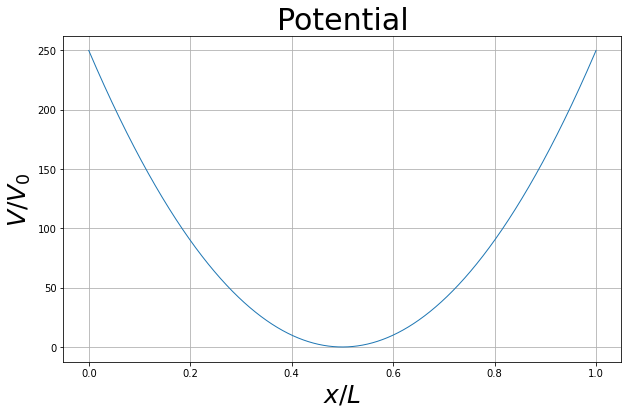

In [6]:
plt.figure(figsize=(10,6))
plt.plot(y, mL2V(y), lw=1)
plt.title('Potential', fontsize=30)
plt.ylabel('$V/V_0$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.savefig('v3p1.png', dpi=200)

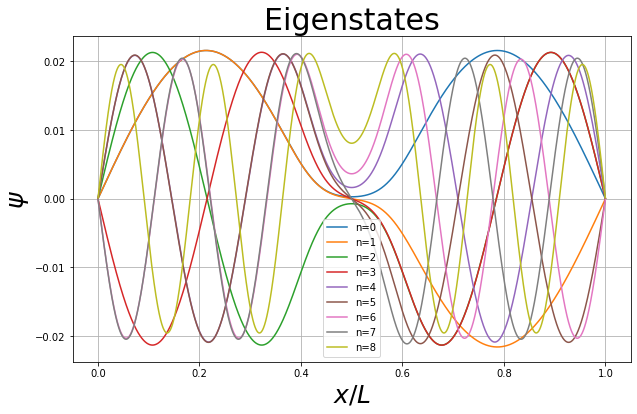

In [32]:
plt.figure(figsize=(10,6))
for j in range(0,9):
    plt.plot(y[1:-1], v.T[j], label='n={}'.format(j))
    
plt.title('Eigenstates', fontsize=30)
plt.ylabel('$\psi$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.legend()
plt.savefig('v3p2.png', dpi=200)

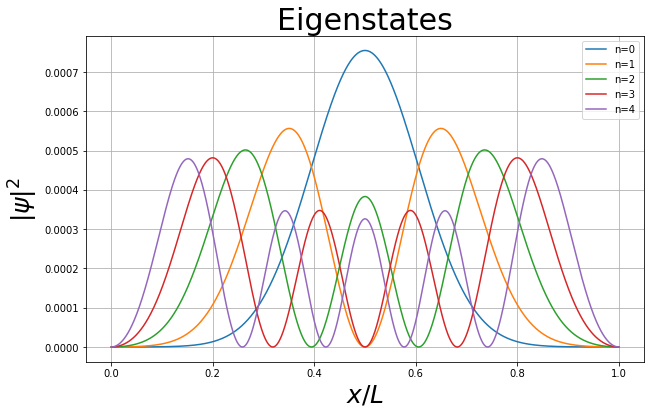

In [8]:
plt.figure(figsize=(10,6))
for j in range(0,50):
    plt.plot(y[1:-1], np.abs(v.T[j])**2, label='n={}'.format(j))
    
plt.title('Eigenstates', fontsize=30)
plt.ylabel('$|\psi|^2$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.legend()
plt.savefig('v3p2.png', dpi=200)

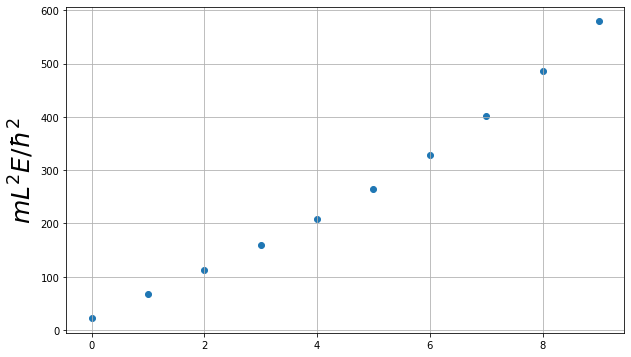

In [9]:
#plt.bar(np.arange(0, 10, 1), w[0:10])
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0,10,1),w[0:10])
plt.ylabel('$mL^2 E/\hbar^2$', fontsize=25)
plt.grid()

# Example with a barrier

In [10]:
y0 = 0.5
sigma = 0.05
def mL2V(y):
    return 1000*np.exp(-(y-y0)**2/(2*sigma**2))

In [11]:
d = 1/dy**2 + mL2V(y)[1:-1]
e = -1/(2*dy**2) * np.ones(len(d)-1)

In [12]:
w, v = eigh_tridiagonal(d, e)

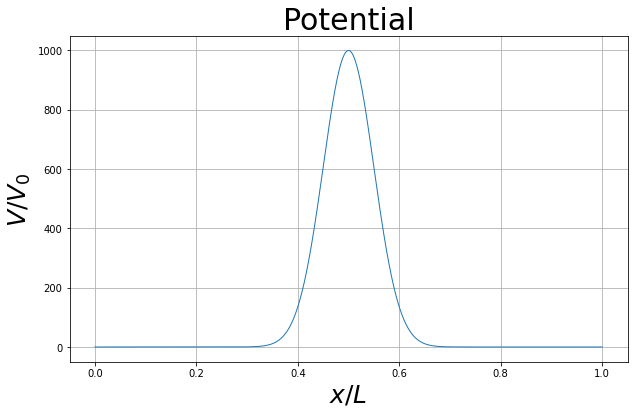

In [13]:
plt.figure(figsize=(10,6))
plt.plot(y, mL2V(y), lw=1)
plt.title('Potential', fontsize=30)
plt.ylabel('$V/V_0$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.savefig('v3p1.png', dpi=200)

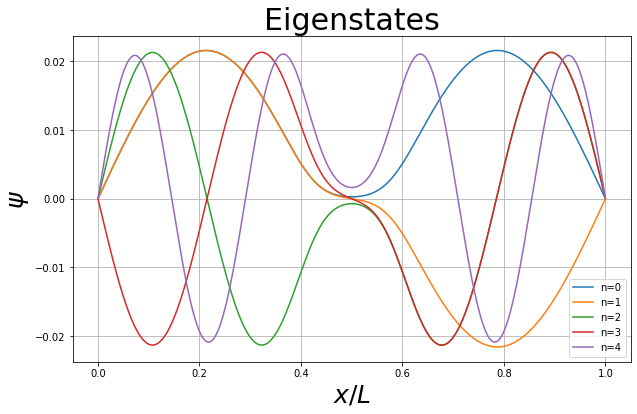

In [14]:
plt.figure(figsize=(10,6))
for j in range(0,5):
    plt.plot(y[1:-1], v.T[j], label='n={}'.format(j))
    
plt.title('Eigenstates', fontsize=30)
plt.ylabel('$\psi$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.legend()
plt.savefig('v3p2.png', dpi=200)

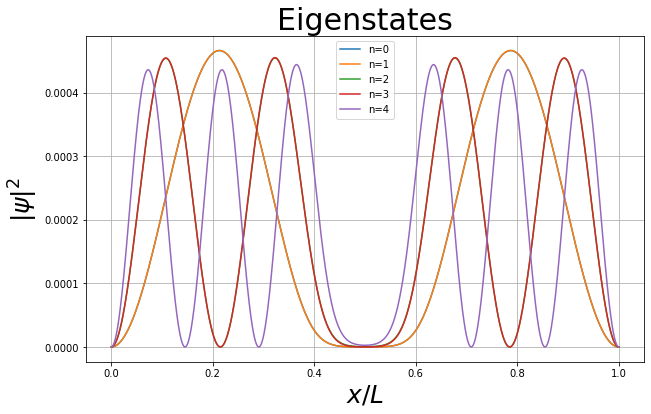

In [15]:
plt.figure(figsize=(10,6))
for j in range(0,5):
    plt.plot(y[1:-1], np.abs(v.T[j])**2, label='n={}'.format(j))
    
plt.title('Eigenstates', fontsize=30)
plt.ylabel('$|\psi|^2$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.legend()
plt.savefig('v3p2.png', dpi=200)

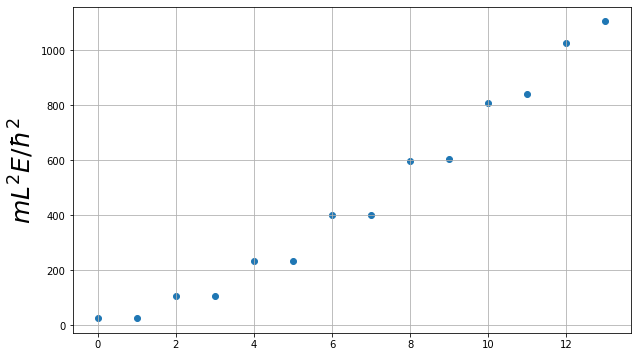

In [16]:
#plt.bar(np.arange(0, 10, 1), w[0:10])
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0,14,1),w[0:14])
plt.ylabel('$mL^2 E/\hbar^2$', fontsize=25)
plt.grid()